In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import cv
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
%matplotlib inline

pd.set_option('display.max_columns',45)

In [19]:
df_train = pd.read_csv('ML_Artivatic_dataset/train_indessa.csv')
df_test = pd.read_csv('ML_Artivatic_dataset/test_indessa.csv')


In [5]:
df_train.shape,df_test.shape

((532428, 45), (354951, 44))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [7]:
df_test.shape[0]*100/(df_test.shape[0]+df_train.shape[0])

39.99993238514772

In [8]:
df_train.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [9]:
df_train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [20]:
df_train['loan_status'].value_counts()
df_train['term']

0         36 months
1         36 months
2         36 months
3         36 months
4         36 months
            ...    
532423    36 months
532424    60 months
532425    60 months
532426    60 months
532427    36 months
Name: term, Length: 532428, dtype: object

In [21]:
df_train['term'].replace(to_replace='months',value='', regex=True,inplace=True)
df_train['term'].replace(to_replace=' ',value="", regex=True,inplace=True) 
df_train['term']=pd.to_numeric(df_train['term'],errors='coerce')
df_train['term'].value_counts()

36    372793
60    159635
Name: term, dtype: int64

In [24]:
df_train['emp_length'].replace(to_replace='n/a',value='0',inplace=True)
df_train['emp_length'].replace(to_replace='year',value= "",inplace=True)
df_train['emp_length'].replace(to_replace='s',value= "",inplace=True)
df_train['emp_length'].replace(to_replace='+',value= "",inplace=True)
df_train['emp_length'].replace(to_replace='<',value= "",inplace=True)
df_train['emp_length'].replace(to_replace='>',value= "",inplace=True)
df_train['emp_length'].replace(to_replace=' ',value= "",inplace=True)

df_train['emp_length']=pd.to_numeric(df_train['emp_length'],errors='coerce')
df_train['emp_length'].value_counts()

2.0    47276
3.0    42175
1.0    34202
5.0    33393
4.0    31581
7.0    26680
8.0    26443
6.0    25741
9.0    20688
Name: emp_length, dtype: int64

In [25]:
df_train['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df_train['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True) 

df_train['sub_grade'] = pd.to_numeric(df_train['sub_grade'], errors='coerce')

In [26]:
df_train['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df_train['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

df_train['last_week_pay'] = pd.to_numeric(df_train['last_week_pay'], errors='coerce')

In [27]:
df_train.isnull().sum() 

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                     244249
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [28]:
df_train_cat=df_train.dtypes[df_train.dtypes == object]
df_train_num=df_train.dtypes[df_train.dtypes != object].index.values
df_train_cat

batch_enrolled               object
grade                        object
emp_title                    object
home_ownership               object
verification_status          object
pymnt_plan                   object
desc                         object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
initial_list_status          object
application_type             object
verification_status_joint    object
dtype: object

In [29]:
df_train[df_train_num]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,74.0,26.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,10.99,14,NaN,65000.0,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,NaN,9.0,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,NaN,9.0,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,19.72,35,NaN,105000.0,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,NaN,135.0,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,10.64,12,NaN,52000.0,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,NaN,96.0,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36,12.49,15,NaN,75000.0,14.53,0.0,0.0,NaN,51.0,12.0,1.0,15775.0,63.6,34.0,2595.45,0.0,0.0,0.0,0.0,NaN,65.0,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60,14.99,25,NaN,59000.0,22.97,0.0,0.0,NaN,81.0,10.0,1.0,9453.0,53.1,29.0,2182.92,0.0,0.0,0.0,0.0,NaN,70.0,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60,20.80,41,8.0,42504.0,27.27,0.0,1.0,26.0,NaN,14.0,0.0,12085.0,49.9,26.0,645.32,0.0,0.0,0.0,0.0,NaN,9.0,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60,16.29,32,1.0,50000.0,14.91,0.0,1.0,NaN,NaN,7.0,0.0,20902.0,89.7,14.0,4619.79,0.0,0.0,0.0,0.0,NaN,78.0,0.0,0.0,29197.0,23300.0,0


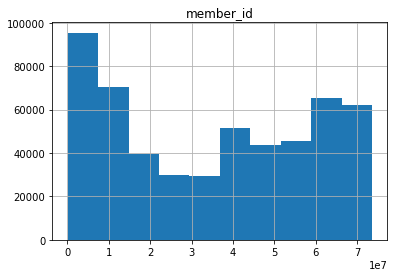

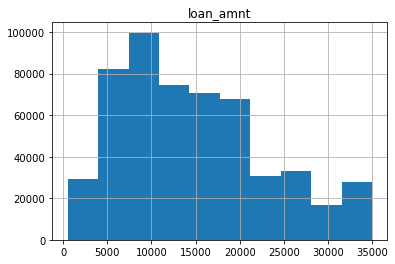

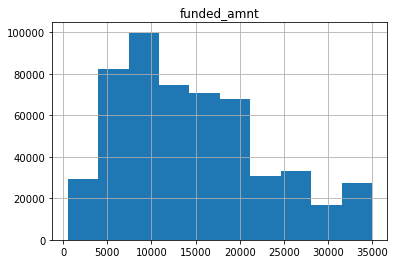

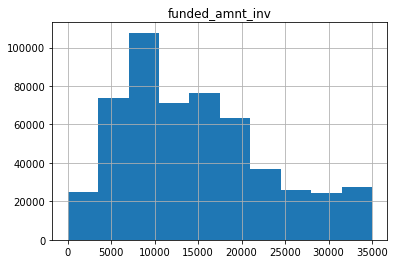

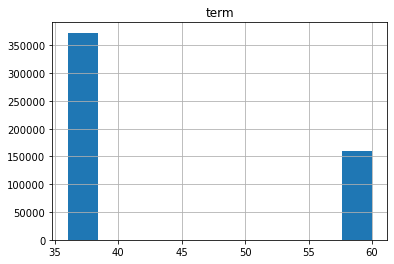

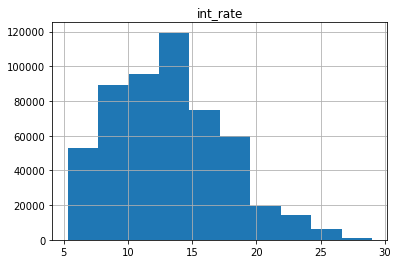

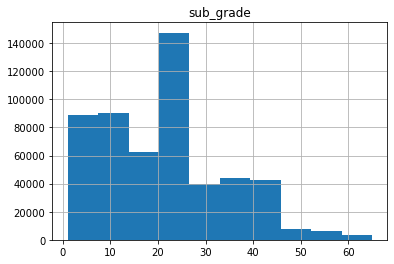

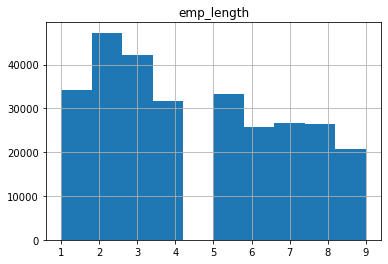

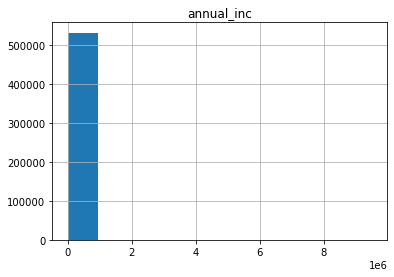

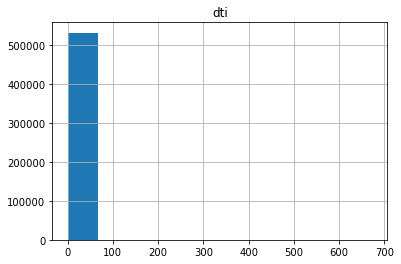

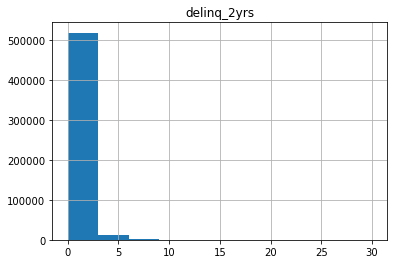

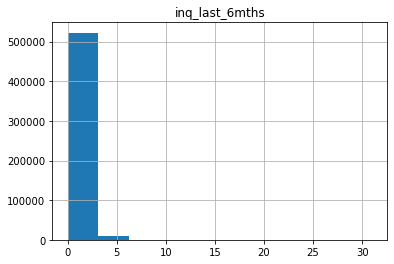

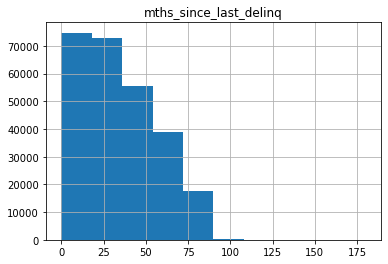

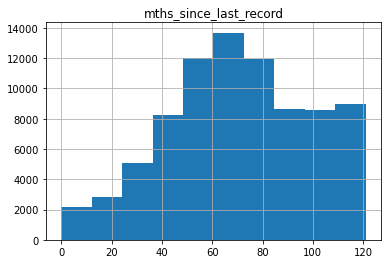

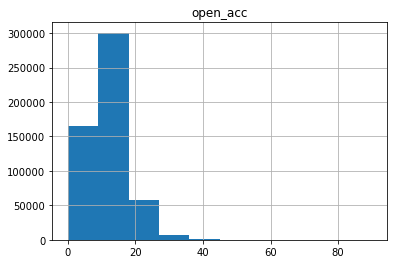

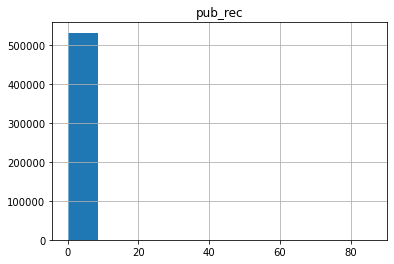

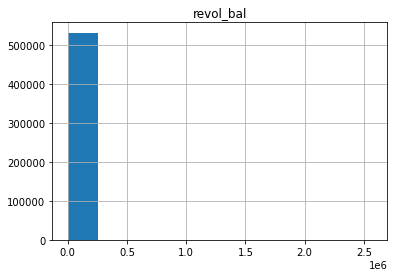

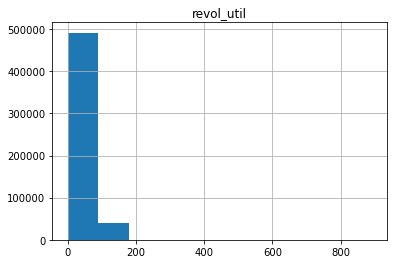

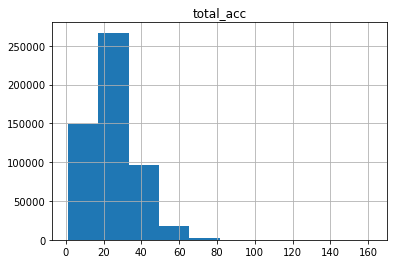

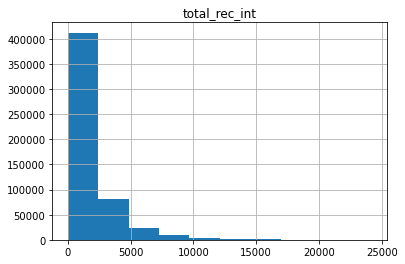

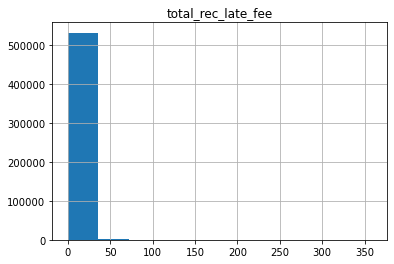

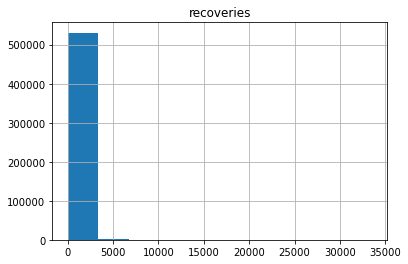

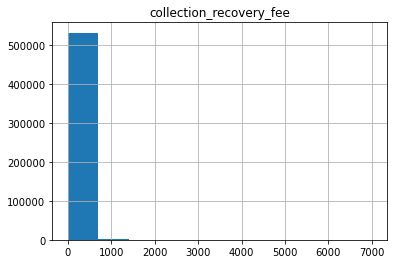

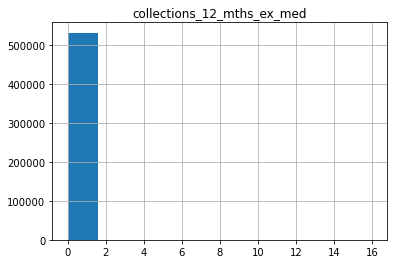

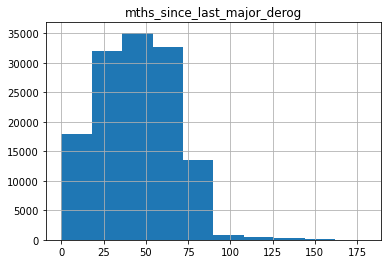

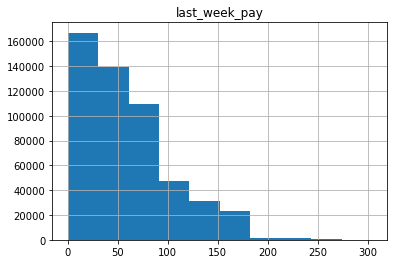

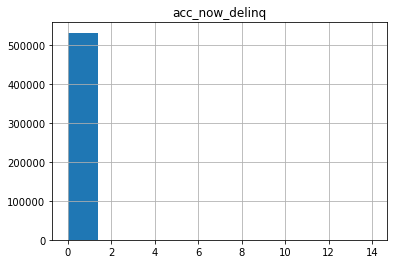

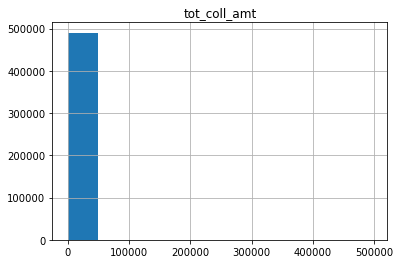

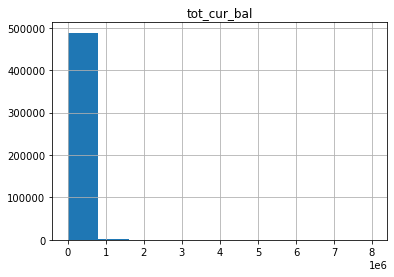

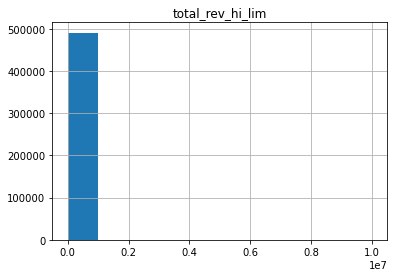

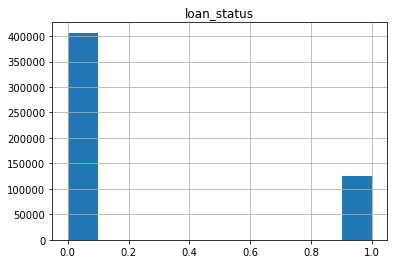

In [30]:
#bin_value=np.arange(start=100,stop=50000,step=100)
for col in df_train_num:
    df_train[[col]].hist()
    plt.show()

In [31]:
df_train.drop(['member_id','desc', 'zip_code', 'emp_title', 'title', 'batch_enrolled'], axis=1, inplace=True)

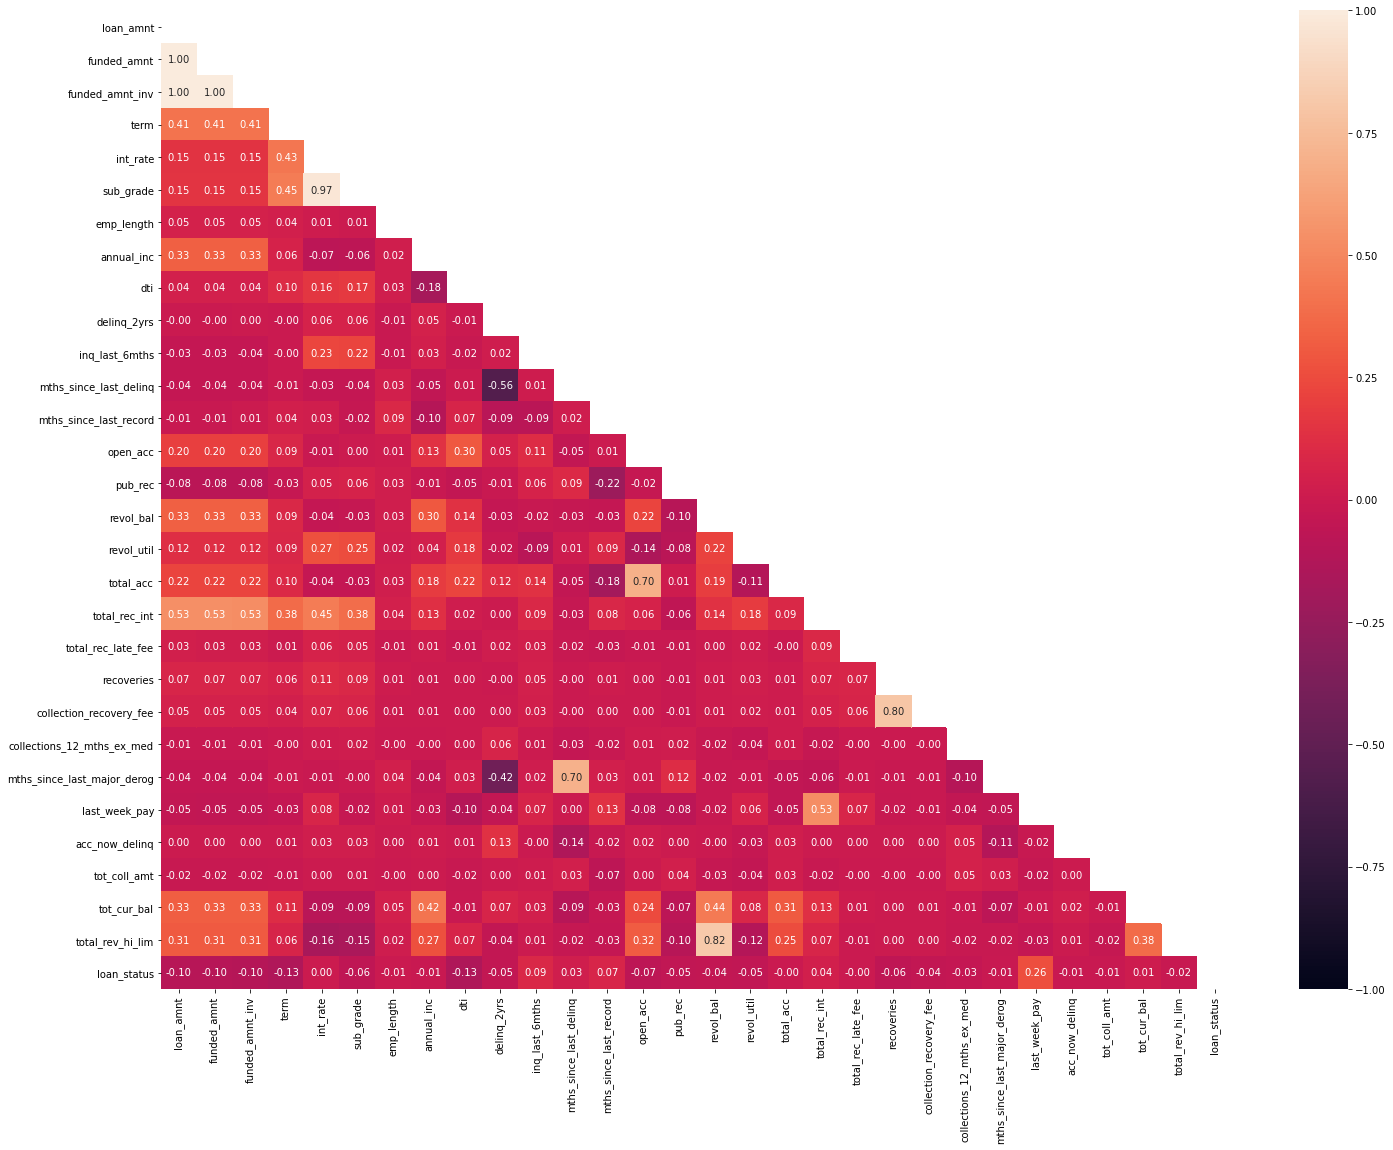

In [33]:
df_train_num=df_train.dtypes[df_train.dtypes != object].index.values
plt.figure(figsize=(24, 18))
corrMatrix = df_train[df_train_num].corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))
sns.heatmap(corrMatrix, mask=mask, vmin=-1, vmax=1,fmt='.2f', annot=True)
plt.show()

In [34]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
loan_amnt,loan_amnt,0.000000
application_type,application_type,0.000000
collection_recovery_fee,collection_recovery_fee,0.000000
recoveries,recoveries,0.000000
total_rec_late_fee,total_rec_late_fee,0.000000
total_rec_int,total_rec_int,0.000000
initial_list_status,initial_list_status,0.000000
revol_bal,revol_bal,0.000000
dti,dti,0.000000
addr_state,addr_state,0.000000


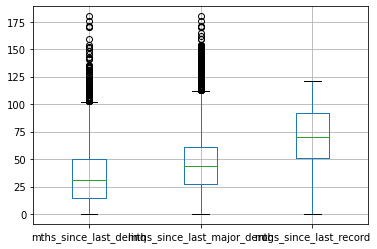

In [35]:
boxplot = df_train.boxplot(column=['mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record'])
boxplot

In [36]:
df_train.drop(['mths_since_last_delinq','mths_since_last_major_derog', 'mths_since_last_record', 'verification_status_joint'], axis=1, inplace=True)

In [37]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
loan_amnt,loan_amnt,0.000000
application_type,application_type,0.000000
collection_recovery_fee,collection_recovery_fee,0.000000
recoveries,recoveries,0.000000
total_rec_late_fee,total_rec_late_fee,0.000000
total_rec_int,total_rec_int,0.000000
initial_list_status,initial_list_status,0.000000
revol_bal,revol_bal,0.000000
dti,dti,0.000000
addr_state,addr_state,0.000000


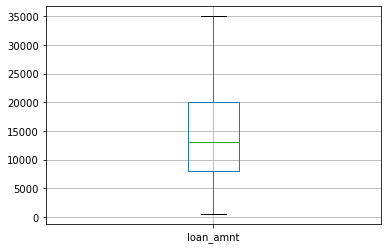

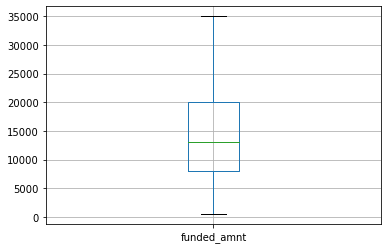

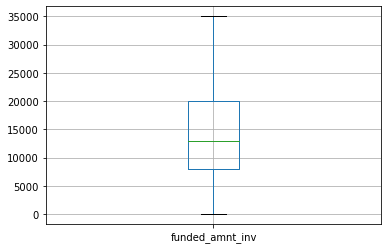

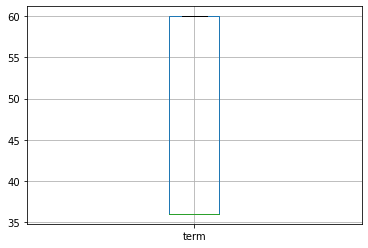

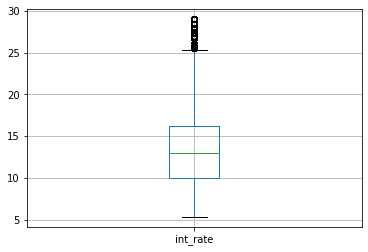

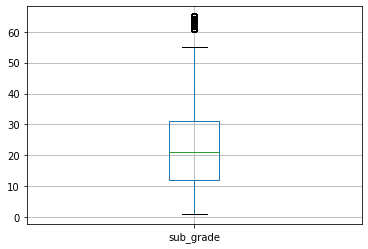

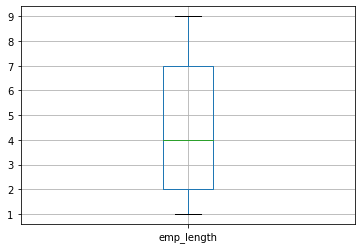

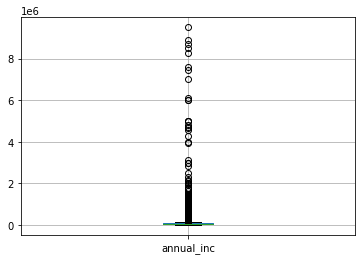

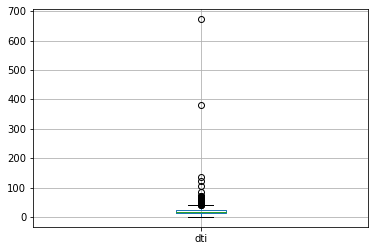

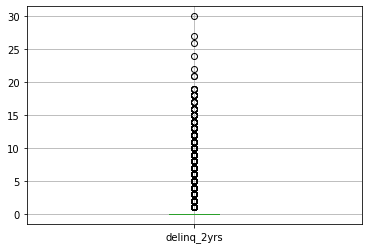

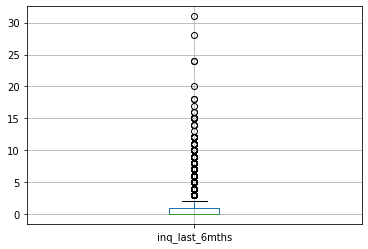

KeyError: "None of [Index(['mths_since_last_delinq'], dtype='object')] are in the [columns]"

In [38]:
#plt.figure(figsize=(24, 18))
for col in df_train_num:
    df_train[[col]].boxplot()
    plt.show()


In [39]:
df_train.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,288179.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,521814.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,14757.595722,14744.271291,14704.926696,43.195790,13.242969,20.940448,4.467744,7.502984e+04,18.138767,0.314448,0.694603,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,58.099553,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,8434.420080,8429.139277,8441.290381,10.996354,4.379611,12.974251,2.494233,6.519985e+04,8.369074,0.860045,0.997025,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,44.317424,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,500.000000,500.000000,0.000000,36.000000,5.320000,1.000000,1.000000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,12.000000,2.000000,4.500000e+04,11.930000,0.000000,0.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,13000.000000,13000.000000,13000.000000,36.000000,12.990000,21.000000,4.000000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,16.200000,31.000000,7.000000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,83.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,28.990000,65.000000,9.000000,9.500000e+06,672.520000,30.000000,31.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,304.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [40]:
cols=['grade','home_ownership','verification_status','pymnt_plan','purpose','addr_state','initial_list_status','application_type']

for col in cols:
    print(f"feature.........{col}")
    print(df_train[col].value_counts(normalize=True) * 100)

feature.........grade
B    28.682376
C    27.703088
A    16.735972
D    15.695456
E     7.981361
F     2.596783
G     0.604964
Name: grade, dtype: float64
feature.........home_ownership
MORTGAGE    49.948538
RENT        40.130872
OWN          9.891290
OTHER        0.021975
NONE         0.006761
ANY          0.000563
Name: home_ownership, dtype: float64
feature.........verification_status
Source Verified    37.141172
Verified           32.812324
Not Verified       30.046504
Name: verification_status, dtype: float64
feature.........pymnt_plan
n    99.998497
y     0.001503
Name: pymnt_plan, dtype: float64
feature.........purpose
debt_consolidation    59.160863
credit_card           23.227554
home_improvement       5.838724
other                  4.817928
major_purchase         1.931529
small_business         1.154334
car                    0.989054
medical                0.961069
moving                 0.609096
vacation               0.528147
house                  0.407567
wedding       

In [41]:
df_train.groupby('grade')['loan_status'].count()
df_train.groupby(['loan_status','grade'])['loan_status'].count()

loan_status  grade
0            A         65148
             B        112507
             C        115579
             D         65419
             E         34553
             F         10934
             G          2461
1            A         23959
             B         40206
             C         31920
             D         18148
             E          7942
             F          2892
             G           760
Name: loan_status, dtype: int64

In [42]:
databefor_enc=df_train.copy()

In [43]:
cols_for_onehot_encoding=['grade','home_ownership','verification_status','pymnt_plan','purpose','addr_state','initial_list_status','application_type']
df11=pd.get_dummies(df_train[cols_for_onehot_encoding],drop_first=True)
df11

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,...,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_JOINT
0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532424,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
532425,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
532426,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
#df_num=pd.DataFrame(df_train[df_train.dtypes[df_train.dtypes != object]])
#df_num
to_be_dropped=['grade','home_ownership','verification_status','pymnt_plan','purpose','addr_state','initial_list_status','application_type']
df_num= df_train.drop(to_be_dropped,axis=1)
df_num

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,26.0,0.0,0.0,28699.0,30800.0,0
1,4800,4800,4800.0,36,10.99,14,NaN,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9974.0,32900.0,0
2,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,9.0,0.0,65.0,38295.0,34900.0,0
3,15000,15000,15000.0,36,19.72,35,NaN,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,135.0,0.0,0.0,55564.0,24700.0,0
4,16000,16000,16000.0,36,10.64,12,NaN,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,96.0,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,20000,20000,20000.0,36,12.49,15,NaN,75000.0,14.53,0.0,0.0,12.0,1.0,15775.0,63.6,34.0,2595.45,0.0,0.0,0.0,0.0,65.0,0.0,0.0,83087.0,24800.0,0
532424,12000,12000,12000.0,60,14.99,25,NaN,59000.0,22.97,0.0,0.0,10.0,1.0,9453.0,53.1,29.0,2182.92,0.0,0.0,0.0,0.0,70.0,0.0,0.0,227812.0,17800.0,0
532425,18725,18725,18725.0,60,20.80,41,8.0,42504.0,27.27,0.0,1.0,14.0,0.0,12085.0,49.9,26.0,645.32,0.0,0.0,0.0,0.0,9.0,0.0,0.0,26010.0,24200.0,1
532426,21000,21000,21000.0,60,16.29,32,1.0,50000.0,14.91,0.0,1.0,7.0,0.0,20902.0,89.7,14.0,4619.79,0.0,0.0,0.0,0.0,78.0,0.0,0.0,29197.0,23300.0,0


In [45]:
final_data= pd.concat([df_num, df11], sort=False,axis=1)
final_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,...,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_JOINT
0,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,26.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4800,4800,4800.0,36,10.99,14,NaN,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,9.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,15000,15000,15000.0,36,19.72,35,NaN,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,16000,16000,16000.0,36,10.64,12,NaN,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,96.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,20000,20000,20000.0,36,12.49,15,NaN,75000.0,14.53,0.0,0.0,12.0,1.0,15775.0,63.6,34.0,2595.45,0.0,0.0,0.0,0.0,65.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532424,12000,12000,12000.0,60,14.99,25,NaN,59000.0,22.97,0.0,0.0,10.0,1.0,9453.0,53.1,29.0,2182.92,0.0,0.0,0.0,0.0,70.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
532425,18725,18725,18725.0,60,20.80,41,8.0,42504.0,27.27,0.0,1.0,14.0,0.0,12085.0,49.9,26.0,645.32,0.0,0.0,0.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
532426,21000,21000,21000.0,60,16.29,32,1.0,50000.0,14.91,0.0,1.0,7.0,0.0,20902.0,89.7,14.0,4619.79,0.0,0.0,0.0,0.0,78.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
target_var=final_data['loan_status']
final_train_data=final_data.drop('loan_status',axis=1)
final_train_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,...,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_JOINT
0,14350,14350,14350.0,36,19.19,43,9.0,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,26.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4800,4800,4800.0,36,10.99,14,NaN,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,10000,10000,10000.0,36,7.26,4,2.0,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,9.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,15000,15000,15000.0,36,19.72,35,NaN,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,16000,16000,16000.0,36,10.64,12,NaN,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,96.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:


X_train, X_test, y_train, y_test = train_test_split(final_train_data, target_var, test_size = 0.3, random_state = 0)

In [48]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:

y_pred = xgb_clf.predict(X_test)


print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9123


In [50]:

data_dmatrix = xgb.DMatrix(data=final_train_data,label=target_var)

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [60]:
print("Features sorted by their score:")
feature_importances = pd.DataFrame(xgb_clf.feature_importances_,
                                   index = final_train_data.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Features sorted by their score:
                        importance
recoveries                0.222601
tot_cur_bal               0.138580
term                      0.096440
initial_list_status_w     0.079264
last_week_pay             0.044167
...                            ...
addr_state_IN             0.000000
addr_state_KS             0.000000
addr_state_KY             0.000000
addr_state_MA             0.000000
application_type_JOINT    0.000000

[105 rows x 1 columns]


In [51]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.667231,0.000481,0.666217,0.000222
1,0.732657,0.015118,0.730625,0.015039
2,0.751779,0.012203,0.750623,0.011489
3,0.765890,0.003919,0.765303,0.004772
4,0.773456,0.002652,0.772495,0.002141


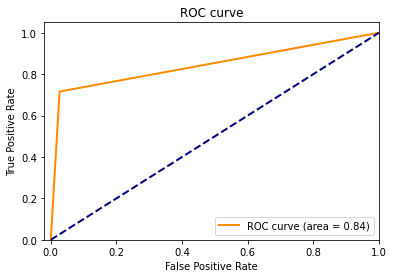

In [54]:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #xgb.plot_importance(gbm)
    #plt.show()
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

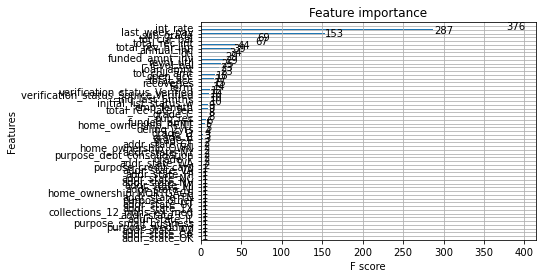

<Figure size 1872x3744 with 0 Axes>

In [52]:

xgb.plot_importance(xgb_clf)
plt.figure(figsize = (26, 52))
plt.show()

In [63]:
#from sklearn.externals import joblib
import joblib
# Save to file in the current working directory
joblib_file = "xgb_joblib_model.pkl"
joblib.dump(xgb_clf, joblib_file)

# Load from file
joblib_model = joblib.load(joblib_file)
y_pred1 = joblib_model.predict(X_test)


print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

XGBoost model accuracy score: 0.9123


In [154]:
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)



In [156]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(final_train_data, target_var), range(5)):
    clf.fit(final_train_data.iloc[train], target_var.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [160]:
final_train_data[final_train_data.isna().any(axis=1)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,...,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_JOINT
17,30750,30750,30700.00,36,16.99,31,NaN,70000.0,29.13,3.0,2.0,7.0,0.0,17299.0,99.4,35.0,7394.32,0.0,0.00,0.00,0.0,104.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,12400,12400,12400.00,36,6.62,2,2.0,40000.0,20.31,0.0,2.0,6.0,0.0,1804.0,12.2,9.0,0.00,0.0,712.76,7.03,0.0,NaN,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,10000,10000,10000.00,60,19.52,43,NaN,29500.0,6.59,0.0,1.0,6.0,0.0,4890.0,54.9,18.0,1147.08,0.0,0.00,0.00,0.0,31.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,5000,5000,5000.00,36,13.98,23,NaN,19000.0,13.90,0.0,0.0,7.0,0.0,5422.0,82.2,12.0,728.43,0.0,0.00,0.00,0.0,65.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,10000,10000,10000.00,60,14.85,25,10.0,45000.0,26.76,0.0,0.0,14.0,0.0,17916.0,48.3,28.0,0.00,0.0,0.00,0.00,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532392,9400,9400,9400.00,36,9.76,11,5.0,47000.0,1.15,0.0,0.0,11.0,1.0,1192.0,7.6,26.0,494.98,0.0,445.95,4.21,0.0,31.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
532394,12800,12800,12800.00,60,16.99,33,NaN,75000.0,36.06,0.0,1.0,26.0,1.0,42509.0,73.2,58.0,1214.85,0.0,0.00,0.00,0.0,31.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
532400,20000,20000,20000.00,36,9.17,12,4.0,94000.0,28.25,0.0,0.0,10.0,0.0,12083.0,46.7,31.0,0.00,0.0,0.00,0.00,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
532410,9700,9700,8283.54,36,14.82,43,1.0,37500.0,27.04,0.0,5.0,12.0,0.0,26221.0,78.6,30.0,2367.53,0.0,0.00,0.00,0.0,156.0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
